## Presentación

Estos ejercicios tienen el fin de poder evaluar la situación en la que se encuentra cada unx de ustedes a esta altura de la materia. No es un examen, ni llevará ningún tipo de nota.

Les pedimos que respeten al pie de la letra el nombre de las funciones que les damos para completar y su "signature". Esto es, que respeten los argumentos de entrada y la salida. Esto es porque tenemos una forma de verificación automática que de otra manera no funciona. Cuando hayamos recibido los notebooks, haremos público el código de control.

Por supuesto, si quieren agregar celdas y más código, si quieren hacer pruebas para asegurarse de que el código funciona, etc., pueden hacerlo aquí mismo.

La _modalidad de entrega preferencial_ es a través de GitHub:
1. Hacer un fork del [repositorio](https://github.com/exord/UNSAM_IA), tocando el botón de arriba a la derecha (ver figura). 

2. Crear un subdirectorio dentro del directorio <tt>entregas</tt> con el formato "ApellidoNombre"
3. Completar este notebook y colocarlo en ese directorio. Hacer un "commit" y un "push" a su versión del repositorio.
4. Realizar un <tt>pull request</tt> desde GitHub y seguir las instrucciones. Más información en la [página de GitHub](https://help.github.com/en/github/collaborating-with-issues-and-pull-requests/about-pull-requests).

De ser necesario, en caso de sufrir de **alergia severa a GitHub**, el notebook puede enviarse por email.

La **fecha límite** para la entrega es el **martes 21 de abril a las 20 horas**.

<figure>
    <img src="../../figures/fork_pullrequest.jpeg", alt="Fork", width="800px", 
         style="float: left; margin-right: 10px;"/>
    
     <figcaption>Fig.1 - Ubicación de los botones para Fork y Pull request en Github.</figcaption>
</figure>

## 1. Probabilidad Condicional

In [0]:
#Si estas en Google Colab, ejecuta esta celda una unica vez:
!mkdir datasets
!mkdir datasets/student-alcohol-consumption
!wget https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/student-alcohol-consumption/student-mat.csv
!mv student-mat.csv datasets/student-alcohol-consumption/student-mat.csv

Similar al ***Caso: Apruebo si falto a clase?*** del [notebook de probabilidad condicional](02_Condicional.ipynb), calcule la probabilidad de que un alumno haya faltado menos de 3 veces dado que sacó más de un 60% en la materia, i.e.
$$
P( \text{absences} < 3 | \text{G3} \geq 12).
$$

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

### Notas propias
A fines prácticos, defino como suceso <i>A, el alumno faltó menos de 3 veces </i> y <i>B, el alumno sacó 12 o más</i>. Referencias por <b>p_a</b> y <b>p_b</b> en el código.

In [83]:
import numpy as np
import pandas as pd

def prob_condicional(
    df=pd.read_csv('../../datasets/student-alcohol-consumption/student-mat.csv')):
    """Calcula P(absences < 3 | G3 >= 12).

    Input:
    df -- dataset de estudiantes

    Output:
    p        -- probabilidad de que absences > 3 dado que G3 >= 12
    """
    #Start
    # Dado que el ejercicio es corto, guardo en variables para operar
    # más cómodo (al menos para mi). Además, no se está pidiendo eficiencia
    # en este caso
    notas = df['G3']
    ausencias = df['absences']     
    
    # Miro dónde es que hay más de 12 o igual, de nota (60%)
    aprobo_12 = np.where(notas*5 >= 60, 1, 0)
    # Miro dónde hay menos de 3 ausencias
    ausencias_3 = np.where(ausencias < 3, 1, 0)
    # Miro dónde se dieron ambos casos
    aprob_ausenc = np.where((notas*5 >= 60) & (ausencias < 3), 1, 0)
    
    # Cuento cuantos aprobaron con 12 o más
    N_aprobo_12 = np.sum(aprobo_12)
    # Cuento cuantos faltaron menos de 3 veces
    N_ausencias_3 = np.sum(ausencias_3)
    # Cuento cuantos cumplen con ambas condiciones
    N_aprob_ausenc = np.sum(aprob_ausenc)
    
    print('{:}: alumnos sacaron más de 12\n{:} alumnos faltaron menos de 3 veces'.format(N_aprobo_12,N_ausencias_3))
    print('La cantidad de alumnos que cumplen con ambas condiciones: {:}'.format(N_aprob_ausenc))
    print('El total de alumnos es: {:}'.format(len(df)))
    
    # La probabilidad de faltar menos de 3  veces es:
    p_a = N_ausencias_3/len(df)    
    # La probabilidad de aprobar con 12 o más es:
    p_b = N_aprobo_12/len(df)
    
    # La probabildad: P(A,B) = P(B,A) es:
    p_a_y_b = N_aprob_ausenc/len(df)
    # La probabilidad: P(A/B) = P(B/A)P(A)/P(B) = P(B,A)/P(B)
    
    #guarda el valor final, como un número, en esta variable
    resultado = p_a_y_b/p_b
    
    # Usando las facilidades de Panda
    df['cuenta'] = 1
    df['aprueba_con_12_o_mas'] = aprobo_12
    df['falto_menor_3'] = ausencias_3
    df = df[['aprueba_con_12_o_mas','falto_menor_3','cuenta']]
    pv_table = pd.pivot_table(df,
                              values='cuenta',
                              index=['aprueba_con_12_o_mas'],
                              columns=['falto_menor_3'],
                              aggfunc=np.sum,
                              fill_value=0)
    
    print('\n\nTabla armada usando Pandas:')
    print(pv_table.head())
    
    #Finish
    return resultado


In [84]:
p_a_b = prob_condicional()
print('\n\nLa probabilidad: P(A|B) = P(absences < 3| G3 >= 12) = {:.2}'.format(p_a_b))

162: alumnos sacaron más de 12
183 alumnos faltaron menos de 3 veces
La cantidad de alumnos que cumplen con ambas condiciones: 81
El total de alumnos es: 395


Tabla armada usando Pandas:
falto_menor_3           0    1
aprueba_con_12_o_mas          
0                     131  102
1                      81   81


La probabilidad: P(A|B) = P(absences < 3| G3 >= 12) = 0.5


## 2. Inferencia Bayesiana

Se tira una moneda N veces, de las cuales X sale cara. La moneda sale cara con una frecuencia $\mu$ desconocida, pero que se cree que es *fair*. 

Construya una función que recibe el vector con los N resultados (1: cara, 0: seca) y con él calcule tanto el posterior del parámetro $\mu$ como la probabilidad de que $\mu>0.7$. Use como prior una distribución normal con media 0.5 y desviación estandar 0.1 ($\mathcal{N}(0.5,0.1)$)

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

<b>Ayuda</b>: usar los métodos <tt>pdf</tt> y <tt>pmf</tt> de las clases de <tt>scipy.stats</tt> que se importan al principio de la celda. Revisar también los notebooks de [teoría](03_Inferencia.ipynb) y [práctica](03p_Inferencia_Soluciones.ipynb) que se presentaron en clase.

### Notas propias
Planteo el ejercicio tal que:

$$
P(\mu|(\mu_{n},\sigma_{n})) = \frac{P((\mu_{n},\sigma_{n})|\mu)\cdot P(\mu)}{P((\mu_{n},\sigma_{n}))}
$$

Y como la Prior es una Normal, queda:

$$
P(\mu|(\mu_{n},\sigma_{n})) = \frac{P((\mu_{n},\sigma_{n})|\mu)\cdot N(\mu_{n},\sigma_{n})}{P((\mu_{n},\sigma_{n}))}
$$

In [150]:
import numpy as np
import scipy.stats as st
from matplotlib import pylab as plt

def inferencia_moneda(tiradas, seed=123):
    """Realiza inferencia bayesiana en el parametro mu de una moneda.

    Input:
    tiradas -- Resultado de N tiradas
    seed    -- Semilla para np.random (default=123)

    Output:
    p        -- probabilidad de que mu>0.7
    posterior-- posterior de mu, shape=(100,)
    """
    np.random.seed(seed)
    mu, step = np.linspace(0,1,num=100, retstep=True) #step es el espacio entre puntos

    #Numero de tiradas, y de veces que salio cara
    N=len(tiradas)
    X=np.sum(tiradas)
    
    #Start
    # Coloco los parámetros de mu y sigma conocidos para la Prior
    mu_normal = 0.5
    sigma_normal = 0.1
    # Tenemos la Prior
    prior =  st.norm.pdf(mu,mu_normal,sigma_normal) #Esto es el prior evaluado en el vector mu
    # Tenemos la verosimilitud, que es una Binomial
    verosimilitud = st.binom.pmf(X,N,mu) #La verosimilitud evaluada en el vector mu
    
    # Y calculo la posterior, ya que al no usar la conjugada no dispongo
    # de ninguna propiedad que me ahorre este paso y el siguiente, de normalización
    posterior = prior*verosimilitud #el posterior no normalizado
    evidencia = np.sum(posterior)*(mu[1]-mu[0]) #evidencia o verosimilitud marginalizada
    
    # La posterior normalizada es:
    posterior = posterior/evidencia #normalizamos para obtener el posterior
    
    # entonces, la probabilidad de que mu > 0.7 será la integral 
    p = posterior[mu>0.7].sum()*(1/100) #Probabilidad de que mu > 0.7 
    #Finish
    assert len(posterior) == len(mu), "Tamaño del posterior distinto al de mu"
    return p, np.array(posterior)



La probabilidad de que mu > 0.7 es: 0.007


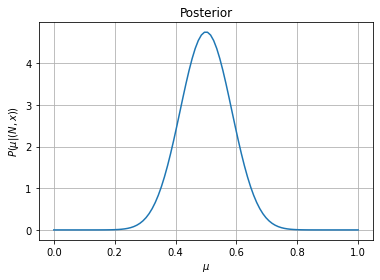

In [153]:
# Defino el mu verdadero del experimento
mu_verdadero = 0.5 # Esto asumo ante el "fair"

# Simulamos todas las tiradas
N_Max = 10
x_total = st.bernoulli.rvs(mu_verdadero,size=int(N_Max))

[p, posterior] = inferencia_moneda(x_total)

fig = plt.figure(1)
plt.plot(np.linspace(0,1,len(posterior)),posterior)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(\mu|(N,x))$')
plt.grid()
plt.title('Posterior')

print("La probabilidad de que mu > 0.7 es: %.3f" %p)

Para calcular la probabilidad de que $\mu > 0.7$ usé una muestra chica, para que de un valor legible tanto en el gráfico como con calculos con np.sum(). Pero está claro, que dado que los datos fueron generados con $\mu = 0.5$, la probabilidad de que $\mu > 0.7$ tiene que tender a cero a medida que la cantidad de tiradas aumenta. (o al menos, eso es lo que yo entiendo :) )

## 3. Regresión Lineal

Construye una función que dado un input (X_train, Y_train) realice un ajuste lineal de cuadrados mínimos, y con ello devuelva las predicciones para el input X_test como un vector Y_test.

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

<b>Ayuda</b>: pueden usar la implementación de las ecuaciones normales que aparece en el notebook de [modelos lineales](05_ModelosLineales.ipynb) o las clases del módulo <tt>sklearn.linear_model</tt>.

### Notas propias
Por una cuestión de que de la guía de ejercicios 5 hice hasta ahora el 1er ejercicio, y me puse con la resolución de esta entrega, no haré uso de sklearn.


In [159]:
import numpy as np

def ajuste_lineal(X_train, Y_train, X_test):
    """Calcula un ajuste lineal.

    Input:
    X_train -- datos de entrenamiento, shape=(N,1)
    Y_train -- etiquetas de entrenamiento, shape=(N,1)
    X_test  -- datos de testeo, shape=(N_test,1)

    Output:
    Y_test  -- prediccion de etiquetas para X_test, shape=(N_test,1)
    """

    N=len(X_train)
    N_test=len(X_test)
    #Start
    
    # Ahora, hay que armar el conjunto de operaciones entre la matriz
    # Phi, Phi traspuesta, la inversa y el vector Y. Para ello
    Phi = np.hstack((X_train*0.0 + 1,X_train)) # en la columna 1 van todos "1", pero
                                 # es necesario que las 2 columnas
                                 # tengan el mismo tamaño para ser concatenadas
                                 # Por eso se multiplica por cada valor de x
                                 # con 0, y se suma 1. Queda la columna con 
                                 # N unos.
    
    # Realizamos el producto entre Phi Traspuesta y Phi
    primer_prod  = np.dot(Phi.T,Phi)
    
    # Lo mismo entre Phi Traspuesta y el vector t
    segundo_prod = np.dot(Phi.T,Y_train)
    
    # Resolvemos la ecuación utilizando:
    w_ml = np.linalg.solve(primer_prod, segundo_prod) # Esto es más estable que hacer la inversa y multiplicar
    
    # Hasta acá, tenemos los valores estimados de nuestra recta de ajuste.
    # y ahora la usamos para estimar los valores de Y_test.
    # Armo mi matriz de diseño con los valores de testeo
    Phi_Test = np.hstack((X_test*0.0 + 1,X_test))
    
    #ahora guardamos los resultados en esta variable
    Y_test = Phi_Test.dot(w_ml) 
    #Finish
    assert len(Y_test) == len(X_test), "Tamaño de Y_test distinto al de X_test"
    return np.array(Y_test)

(100,) (100,)


Text(0.5, 1.0, 'Datos generados (todos)\ny recta de estimación')

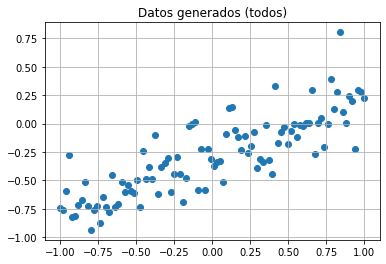

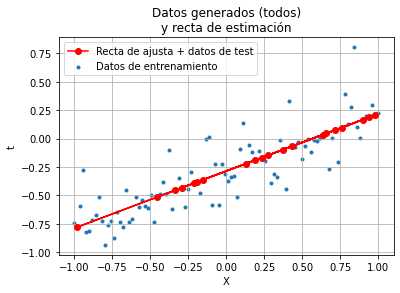

In [162]:
# Voy usar un método escrito por la cátedra:
def elegir_test(data, fraccion, seed=1234):

    # Fijar el seed para ser reproducible
    import numpy.random as rr
    if seed is not None:
        rr.seed(seed)
    
    # Permuta los índices para elegir al azar
    ind = rr.permutation(len(data))
    
    # Calcula el número de elementos en el set de test
    ntest = int(len(data) * fraccion)
    
    # Construye los índices para cada conjunto
    indices_train = ind[ntest:]
    indices_test = ind[:ntest]
    return data[indices_train], data[indices_test]

# Uso los valores de la guía de ejercicios 5
N = 100
mu = 0
sigma = 0.2
a0 = -0.3
a1 = 0.5

impacto_ruido = 1

def recta(x,a0,a1,e):
    return a0 + a1*x + e

x = np.linspace(-1,1,N)

error = impacto_ruido*st.norm.rvs(loc=mu,scale=sigma,size=N)

t = recta(x,a0,a1,error)

print(x.shape, t.shape)

fig1 = plt.figure(1)
plt.scatter(x,t)
plt.grid()
plt.title('Datos generados (todos)')

# Entonces, construyo un único array con los datos x y t
data = np.stack((x,t),axis=1)

# Separo datos de entrenamiento, de datos de evaluación. 20% para el test
[data_train, data_test] = elegir_test(data,0.2)

# Re ordenamos para continuar:
X_train = data_train[:,0].reshape(len(data_train), 1)
Y_train = data_train[:,1].reshape(len(data_train), 1)
X_test = data_test[:,0].reshape(len(data_test),1)

# Evalúo con el método definido
Y_test = ajuste_lineal(X_train, Y_train, X_test)

fig2 = plt.figure(2)
plt.scatter(X_train,Y_train,s=9, label='Datos de entrenamiento')
plt.plot(X_test,Y_test,'r-o',label='Recta de ajusta + datos de test')
plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('t')
plt.title('Datos generados (todos)\ny recta de estimación')